<a href="https://colab.research.google.com/github/b62mp1/ExistingResults/blob/main/arimaCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import datetime as dt

today=dt.date.today()

startDate=today-dt.timedelta(days=5*365)

In [5]:
df = pdr.get_data_yahoo("AMZN", start=(startDate), end=today)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-14,778.250000,780.859985,762.809998,768.820007,768.820007,5454836
2016-12-15,766.280029,769.099976,760.309998,761.000000,761.000000,3801927
2016-12-16,765.000000,765.130005,754.000000,757.770020,757.770020,4848219
2016-12-19,758.890015,770.500000,756.159973,766.000000,766.000000,3113240
2016-12-20,768.650024,774.390015,767.710022,771.219971,771.219971,2703629
...,...,...,...,...,...,...
2021-12-06,3393.000000,3473.909912,3338.689941,3427.370117,3427.370117,3443000
2021-12-07,3492.000000,3549.989990,3466.689941,3523.290039,3523.290039,3320536
2021-12-08,3523.010010,3543.600098,3495.010010,3523.159912,3523.159912,2262683


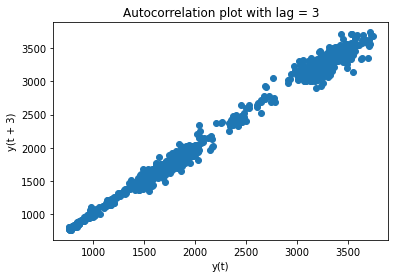

In [6]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('Autocorrelation plot with lag = 3')
plt.show()

In [7]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]

model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 3504.5727775645646


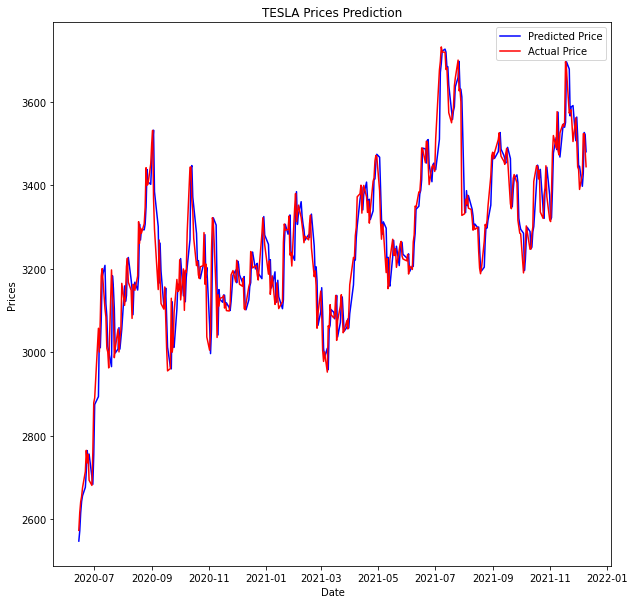

In [8]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(10,10))

plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()